## Lennard Jones  Potential##

$$v(r)=4\epsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^6\right]$$

$\epsilon$ is the well depth of the energy-separation, $\sigma$ is the collision diameter (the separation for which the energy is 0), r is the separation.

$\epsilon$ and $\sigma$ are inherant to atoms

$$U(x) = -\int{F(x)}\,dx$$

$$F(x) = -\frac{d}{dx}U(x)$$

For 3 dimensions:

$$U(x, y, z) = \frac{1}{2}kx^2 + \frac{1}{2}ky^2 + \frac{1}{2}kz^2$$

$$U(x, y, z) = -\int{F_1(x)}\,dx -\int{F_2(y)}\,dy -\int{F_3(z)}\,dz$$

$$F_1 = -\frac{\partial U(x, y, z)}{dx}$$

$$F_2 = -\frac{\partial U(x, y, z)}{dy}$$

$$F_3 = -\frac{\partial U(x, y, z)}{dz}$$

$$\therefore\,\, F(r) = \frac{24\epsilon}{\sigma}\left[2\left(\frac{\sigma}{r}\right)^{13}-\left(\frac{\sigma}{r}\right)^7\right]$$

Internal coordinates, need to consider:

* Bonds
* Angles

Cartesian coordinates:

* Atom positions



Maybe use Hooke's law: $F = kx$

Taking a three particle system the distance between particle 1 and 2 would be $r_{12}$ which is equal to $r_{21}$

$$\therefore\,F=kr_{12}$$

$$U = \frac{1}{2}kr_{12}^2$$

k is the force constant, $r_{12}$ is the bond length

Need to condsider the different r values for each of the particles

$$\mathbf{F}_{12} = -\nabla_{\mathbf{r}_1}U(r_{12})$$

$$\mathbf{F}_{12} = -\frac{\partial U(r_{12})}{\partial x_1}-\frac{\partial U(r_{12})}{\partial y_1}-\frac{\partial U(r_{12})}{\partial z_1}$$

Here $r_{12}$ is the same as $\mathbf{r}_2 - \mathbf{r}_1$

In [1]:
import numpy as np


# epsilon and sigma are inherant to atoms, they are constant.
# Argon?
eps = 0.0661
sig = 0.3345
m = 39.948


def LJ_Force(r):  # need to work out along each of the cc for each molecule
    return (float(24 * eps) / sig) * (2 * ((sig / r) ** 13)) - ((sig / r) ** 7)


def LJ_Pot(r):  # this is for a single atom but want to model more
    return (4 * eps) * (((sig / r) ** 12) - ((sig / r) ** 6))


def LJ(r, N):  # r = internuclear distance, N is the number of atoms
    LJ = 0.0
    for i in range(N):
        for j in range(N):
            if i < j:
                LJ += (4 * eps) * (((sig / r) ** 12) - ((sig / r) ** 6))
    return LJ



def verlet(v, r, dt):  # will have a verlet for each x, y, z
    time = 0
    v = v + ((dt / (2 * m)) * LJ_Force(r))
    r = r +(dt * v)
    v = v + ((dt / (2 * m)) * LJ_Force(r))

For two particles 1 $(x_1\,y_1\,z_1)$ and 2 $(x_2\,y_2\,z_2)$, $r_{12}$ apart the potential is given by:

$$v(r_{12})=4\epsilon\left[\left(\frac{\sigma}{r_{12}}\right)^{12}-\left(\frac{\sigma}{r_{12}}\right)^6\right]$$ 

$$Force\,=\,-\frac{d}{dr_{12}}V(r_{12})$$

$$-\frac{dV}{dr_{12}}=\frac{24\epsilon}{\sigma}\left[2\left(\frac{\sigma}{r_{12}}\right)^{13}-\left(\frac{\sigma}{r_{12}}\right)^7\right]$$

$$r_{12} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}$$

$$F_{x_1} = -\frac{\partial V}{\partial x_1} = -\frac{\partial V}{\partial r_{12}}\,\frac{\partial r_{12}}{\partial x_1}$$

$$\frac{\partial r_{12}}{\partial x_1} = -\frac{(x_2 - x_1)}{\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}}$$

$$\frac{\partial r_{12}}{\partial x_2} = \frac{(x_2 - x_1)}{\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}}$$

equal and opposite forces

$$F_{x_1}=-\frac{24\epsilon(x_2 - x_1)}{\sigma\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}}\left[2\left(\frac{\sigma}{r_{12}}\right)^{13}-\left(\frac{\sigma}{r_{12}}\right)^7\right]$$

In [6]:
import numpy as np


# Set parameters
eps = 0.0661
sig = 0.3345
m = 39.948
dt = 0.01
L = 1000  # loops of verlet algorithm
pos = np.random.normal(0, 1, 6)
vel = np.random.normal(0, 1, 6)

# Assign the positions
x1 = pos[0]
x2 = pos[1]
y1 = pos[2]
y2 = pos[3]
z1 = pos[4]
z2 = pos[5]

# Assign the velocities
vx1 = vel[0]
vx2 = vel[1]
vy1 = vel[2]
vy2 = vel[3]
vz1 = vel[4]
vz2 = vel[5]

r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))

r12_trj = [r12]

# Forces
Fx1 = -(float((x2 - x1)) / r12) * dvdr
Fx2 = (float((x2 - x1)) / r12) * dvdr
Fy1 = -(float((y2 - y1)) / r12) * dvdr
Fy2 = (float((y2 - y1)) / r12) * dvdr
Fz1 = -(float((z2 - z1)) / r12) * dvdr
Fz2 = (float((z2 - z1)) / r12) * dvdr

Fx1_trj = [Fx1]
Fx2_trj = [Fx2]
Fy1_trj = [Fy1]
Fy2_trj = [Fy2]
Fz1_trj = [Fz1]
Fz2_trj = [Fz2]

x1_trj = [x1]
x2_trj = [x2]
y1_trj = [y1]
y2_trj = [y2]
z1_trj = [z1]
z2_trj = [z2]

# Verlet for each cartesian coordinate
for l in range(L):
    vx1 = vx1 + ((dt / (2 * m)) * Fx1)
    x1 = x1 + (dt * vx1)
    Fx1 = -(float((x2 - x1)) / r12) * dvdr  # update force, does r12 and dvdr need to be updated too?
    vx1 = vx1 + ((dt / (2 * m)) * Fx1)

    vx2 = vx2 + ((dt / (2 * m)) * Fx2)
    x2 = x2 + (dt * vx2)
    Fx2 = (float((x2 - x1)) / r12) * dvdr
    vx2 = vx2 + ((dt / (2 * m)) * Fx2)

    vy1 = vy1 + ((dt / (2 * m)) * Fy1)
    y1 = y1 + (dt * vy1)
    Fy1 = -(float((y2 - y1)) / r12) * dvdr
    vy1 = vy1 + ((dt / (2 * m)) * Fy1)

    vy2 = vy2 + ((dt / (2 * m)) * Fy2)
    y2 = y2 + (dt * vy2)
    Fy2 = (float((y2 - y1)) / r12) * dvdr
    vy2 = vy2 + ((dt / (2 * m)) * Fy2)

    vz1 = vz1 + ((dt / (2 * m)) * Fz1)
    z1 = z1 + (dt * vz1)
    Fz1 = -(float((z2 - z1)) / r12) * dvdr
    vz1 = vz1 + ((dt / (2 * m)) * Fz1)

    vz2 = vz2 + ((dt / (2 * m)) * Fz2)
    z2 = z2 + (dt * vz2)
    Fz2 = (float((z2 - z1)) / r12) * dvdr
    z2 = vz2 + ((dt / (2 * m)) * Fz2)
    
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    r12_trj.append(r12)
    
    Fx1_trj.append(Fx1)
    Fx2_trj.append(Fx2)
    Fy1_trj.append(Fy1)
    Fy2_trj.append(Fy2)
    Fz1_trj.append(Fz1)
    Fz2_trj.append(Fz2)
    
    x1_trj.append(x1)
    x2_trj.append(x2)
    y1_trj.append(y1)
    y2_trj.append(y2)
    z1_trj.append(z1)
    z2_trj.append(z2)

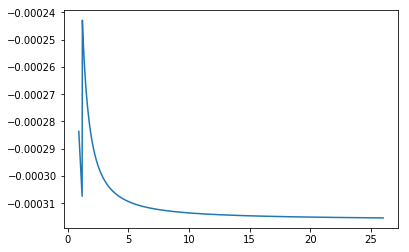

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(r12_trj, Fx1_trj)

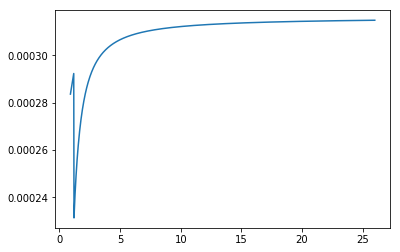

In [8]:
plt.plot(r12_trj, Fx2_trj)

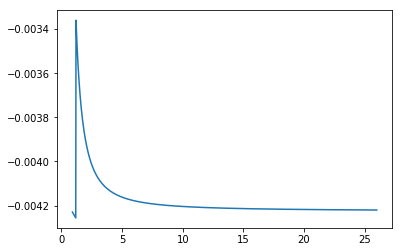

In [9]:
plt.plot(r12_trj, Fy1_trj)

In [10]:
plt.plot(r12_trj, Fy2_trj)

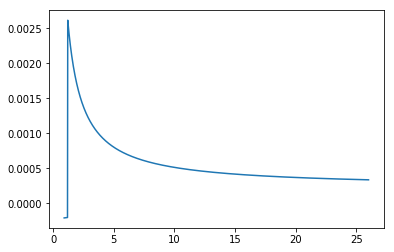

In [11]:
plt.plot(r12_trj, Fz1_trj)

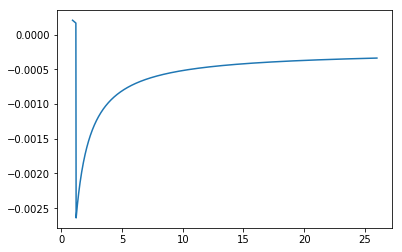

In [12]:
plt.plot(r12_trj, Fz2_trj)

Updating r12 and dvdr in each verlet step to see how this effects the plots produced.

In [13]:
# SET PARAMETERS
eps = 0.0661
sig = 0.3345
m = 39.948
dt = 0.01
L = 10000  # loops of verlet algorithm
pos = np.random.normal(0, 1, 6)
vel = np.random.normal(0, 1, 6)

# ASSIGN POSITIONS
x1 = pos[0]
x2 = pos[1]
y1 = pos[2]
y2 = pos[3]
z1 = pos[4]
z2 = pos[5]

# ASSIGN VELOCITIES
vx1 = vel[0]
vx2 = vel[1]
vy1 = vel[2]
vy2 = vel[3]
vz1 = vel[4]
vz2 = vel[5]

r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
dvdr = (float(24 * eps) / sig) * ((2 * ((float(sig) / r12) ** 13)) - ((float(sig) / r12) ** 7))

r12_trj = [r12]

# FORCES
Fx1 = -(float((x2 - x1)) / r12) * dvdr
Fx2 = (float((x2 - x1)) / r12) * dvdr
Fy1 = -(float((y2 - y1)) / r12) * dvdr
Fy2 = (float((y2 - y1)) / r12) * dvdr
Fz1 = -(float((z2 - z1)) / r12) * dvdr
Fz2 = (float((z2 - z1)) / r12) * dvdr

Fx1_trj = [Fx1]
Fx2_trj = [Fx2]
Fy1_trj = [Fy1]
Fy2_trj = [Fy2]
Fz1_trj = [Fz1]
Fz2_trj = [Fz2]

x1_trj = [x1]
x2_trj = [x2]
y1_trj = [y1]
y2_trj = [y2]
z1_trj = [z1]
z2_trj = [z2]

# VERLET
for l in range(L):
    #x1
    vx1 = vx1 + ((dt / (2 * m)) * Fx1)
    x1 = x1 + (dt * vx1)
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))
    Fx1 = -(float((x2 - x1)) / r12) * dvdr # update force
    vx1 = vx1 + ((dt / (2 * m)) * Fx1)
    #x2
    vx2 = vx2 + ((dt / (2 * m)) * Fx2)
    x2 = x2 + (dt * vx2)
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))
    Fx2 = (float((x2 - x1)) / r12) * dvdr
    vx2 = vx2 + ((dt / (2 * m)) * Fx2)
    #y1
    vy1 = vy1 + ((dt / (2 * m)) * Fy1)
    y1 = y1 + (dt * vy1)
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))
    Fy1 = -(float((y2 - y1)) / r12) * dvdr
    vy1 = vy1 + ((dt / (2 * m)) * Fy1)
    #y2
    vy2 = vy2 + ((dt / (2 * m)) * Fy2)
    y2 = y2 + (dt * vy2)
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))
    Fy2 = (float((y2 - y1)) / r12) * dvdr
    vy2 = vy2 + ((dt / (2 * m)) * Fy2)
    #z1
    vz1 = vz1 + ((dt / (2 * m)) * Fz1)
    z1 = z1 + (dt * vz1)
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))
    Fz1 = -(float((z2 - z1)) / r12) * dvdr
    vz1 = vz1 + ((dt / (2 * m)) * Fz1)
    #z2
    vz2 = vz2 + ((dt / (2 * m)) * Fz2)
    z2 = z2 + (dt * vz2)
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))
    Fz2 = (float((z2 - z1)) / r12) * dvdr
    z2 = vz2 + ((dt / (2 * m)) * Fz2)
    
    r12_trj.append(r12)
    
    
    # APPEND FORCES 
    Fx1_trj.append(Fx1)
    Fx2_trj.append(Fx2)
    Fy1_trj.append(Fy1)
    Fy2_trj.append(Fy2)
    Fz1_trj.append(Fz1)
    Fz2_trj.append(Fz2)

    x1_trj.append(x1)
    x2_trj.append(x2)
    y1_trj.append(y1)
    y2_trj.append(y2)
    z1_trj.append(z1)
    z2_trj.append(z2)

In [14]:
plt.plot(r12_trj)

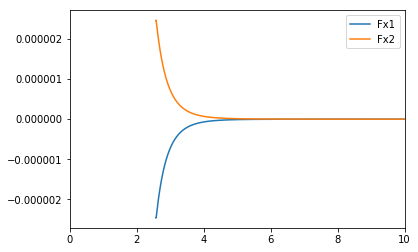

In [15]:
plt.xlim([0, 10])
plt.plot(r12_trj, Fx1_trj, label='Fx1')
plt.plot(r12_trj, Fx2_trj, label='Fx2')
plt.legend(loc='best')

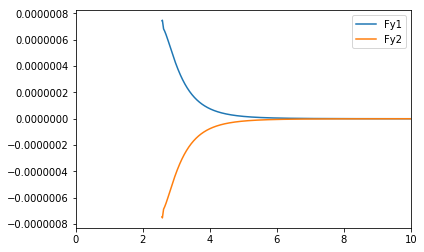

In [16]:
plt.xlim([0, 10])
plt.plot(r12_trj, Fy1_trj, label='Fy1')
plt.plot(r12_trj, Fy2_trj, label='Fy2')
plt.legend(loc='best')

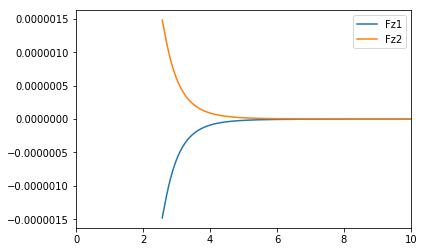

In [17]:
plt.xlim([0, 10])
plt.plot(r12_trj, Fz1_trj, label='Fz1')
plt.plot(r12_trj, Fz2_trj, label='Fz2')
plt.legend(loc='best')

The graphs produced are not consistent, sometimes they will look as expected but most of the time they don't

In [20]:
# SET PARAMETERS
eps = 0.0661
sig = 0.3345
m = 39.948
dt = 0.01
L = 10000  # loops of verlet algorithm
pos = np.random.normal(0, 1, 6)
vel = np.random.normal(0, 1, 6)

# ASSIGN POSITIONS
x1 = pos[0]
x2 = pos[1]
y1 = pos[2]
y2 = pos[3]
z1 = pos[4]
z2 = pos[5]

# ASSIGN VELOCITIES
vx1 = vel[0]
vx2 = vel[1]
vy1 = vel[2]
vy2 = vel[3]
vz1 = vel[4]
vz2 = vel[5]

r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
dvdr = (float(24 * eps) / sig) * ((2 * ((float(sig) / r12) ** 13)) - ((float(sig) / r12) ** 7))

r12_trj = [r12]

# FORCES
Fx1 = -(float((x2 - x1)) / r12) * dvdr
Fx2 = (float((x2 - x1)) / r12) * dvdr
Fy1 = -(float((y2 - y1)) / r12) * dvdr
Fy2 = (float((y2 - y1)) / r12) * dvdr
Fz1 = -(float((z2 - z1)) / r12) * dvdr
Fz2 = (float((z2 - z1)) / r12) * dvdr

Fx1_trj = [Fx1]
Fx2_trj = [Fx2]
Fy1_trj = [Fy1]
Fy2_trj = [Fy2]
Fz1_trj = [Fz1]
Fz2_trj = [Fz2]

x1_trj = [x1]
x2_trj = [x2]
y1_trj = [y1]
y2_trj = [y2]
z1_trj = [z1]
z2_trj = [z2]

# VERLET
for l in range(L):
    vx1 = vx1 + ((dt / (2 * m)) * Fx1)
    vx2 = vx2 + ((dt / (2 * m)) * Fx2)
    vy1 = vy1 + ((dt / (2 * m)) * Fy1)
    vy2 = vy2 + ((dt / (2 * m)) * Fy2)
    vz1 = vz1 + ((dt / (2 * m)) * Fz1)
    vz2 = vz2 + ((dt / (2 * m)) * Fz2)
    
    x1 = x1 + (dt * vx1)
    x2 = x2 + (dt * vx2)
    y1 = y1 + (dt * vy1)
    y2 = y2 + (dt * vy2)
    z1 = z1 + (dt * vz1)
    z2 = z2 + (dt * vz2)
    
    r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
    dvdr = (float(24 * eps) / sig) * ((2 * ((sig / r12) ** 13)) - ((sig / r12) ** 7))
    r12_trj.append(r12)
    
    Fx1 = -(float((x2 - x1)) / r12) * dvdr # update force
    Fx2 = (float((x2 - x1)) / r12) * dvdr
    Fy1 = -(float((y2 - y1)) / r12) * dvdr
    Fy2 = (float((y2 - y1)) / r12) * dvdr
    Fz1 = -(float((z2 - z1)) / r12) * dvdr
    Fz2 = (float((z2 - z1)) / r12) * dvdr
    
    vx1 = vx1 + ((dt / (2 * m)) * Fx1)
    vx2 = vx2 + ((dt / (2 * m)) * Fx2)
    vy1 = vy1 + ((dt / (2 * m)) * Fy1)
    vy2 = vy2 + ((dt / (2 * m)) * Fy2)
    vz1 = vz1 + ((dt / (2 * m)) * Fz1)
    vz2 = vz2 + ((dt / (2 * m)) * Fz2)

    # APPEND FORCES 
    Fx1_trj.append(Fx1)
    Fx2_trj.append(Fx2)
    Fy1_trj.append(Fy1)
    Fy2_trj.append(Fy2)
    Fz1_trj.append(Fz1)
    Fz2_trj.append(Fz2)

    x1_trj.append(x1)
    x2_trj.append(x2)
    y1_trj.append(y1)
    y2_trj.append(y2)
    z1_trj.append(z1)
    z2_trj.append(z2)

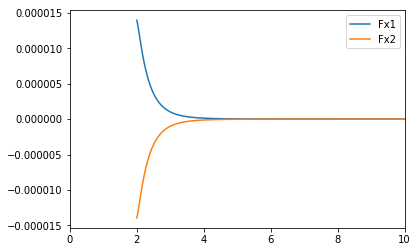

In [21]:
plt.xlim([0, 10])
plt.plot(r12_trj, Fx1_trj, label='Fx1')
plt.plot(r12_trj, Fx2_trj, label='Fx2')
plt.legend(loc='best')

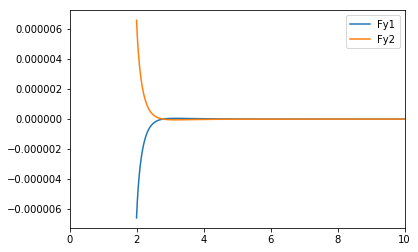

In [22]:
plt.xlim([0, 10])
plt.plot(r12_trj, Fy1_trj, label='Fy1')
plt.plot(r12_trj, Fy2_trj, label='Fy2')
plt.legend(loc='best')

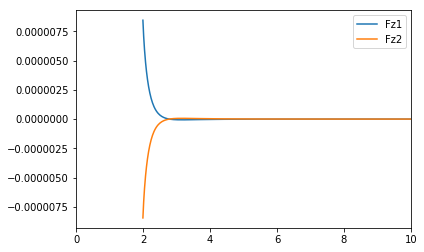

In [23]:
plt.xlim([0, 10])
plt.plot(r12_trj, Fz1_trj, label='Fz1')
plt.plot(r12_trj, Fz2_trj, label='Fz2')
plt.legend(loc='best')

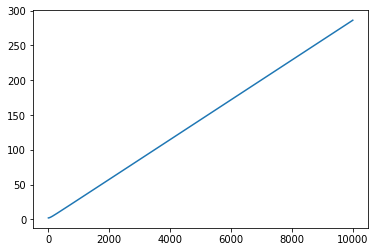

In [24]:
plt.plot(r12_trj)

This should oscillate, repulsive force dominates in the lineaer plot 

In [39]:
r_min = sig * (0.5 ** (-1.0 / 6))
print r_min

0.375463555159


The minimum potential occurs when r12 = 0.375 so need coordinates to reflect this

In [40]:
r_min ** 2

0.14097288125299987

$$(x_{2} - x_{1})^2 + (y_{2} - y_{1})^2 + (z_{2} - z_{1})^2 = 0.14097$$

There are many sets of numbers that this could correspond to, here:
$$(x_{2} - x_{1})^2 = 0.07085$$
$$(y_{2} - y_{1})^2 = 0.03012$$
$$(z_{2} - z_{1})^2 = 0.04$$

In [42]:
print np.sqrt(0.07085)
print np.sqrt(0.03012)
print np.sqrt(0.04)

0.266176633084
0.173551145199
0.2


$$x_{2} - x_{1} = 0.26618$$
$$y_{2} - y_{1} = 0.03012$$
$$z_{2} - z_{1} = 0.2$$

Again there are many values that could make these work to give roughly r_min:

In [43]:
x2 = 0.36618
x1 = 0.1
y2 = 0.23012
y1 = 0.2
z2 = 0.4
z1 = 0.2

r12 = np.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2) + ((z2 - z1) ** 2))
print r12

0.334303764262


In [2]:
-

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(r12_trj)

This should oscillate